<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description 

In this project i am going to create a sentiment analysis classifier for IMDB movie reviews  


Created by : Omar Hazem 

https://www.linkedin.com/in/omarhazem1/

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re
import nltk
from nltk import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup


%matplotlib inline
try:
    df = pd.read_csv('../data/imdb_movie_reviews.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/imdb_movie_reviews_subset.csv')
df.head()

review sentiment
0  John Cassavetes is on the run from the law. He...  positive
1  It's not just that the movie is lame. It's mor...  negative
2  Well, if it weren't for Ethel Waters and a 7-y...  negative
3  I find Alan Jacobs review very accurate concer...  positive
4  This movie is simply awesome. It is so hilario...  positive

# Dataset Exploration 

In [16]:
df.head(10)

review sentiment
0  John Cassavetes is on the run from the law. He...  positive
1  It's not just that the movie is lame. It's mor...  negative
2  Well, if it weren't for Ethel Waters and a 7-y...  negative
3  I find Alan Jacobs review very accurate concer...  positive
4  This movie is simply awesome. It is so hilario...  positive
5  I am surprised that so many comments about thi...  negative
6  Buddy Manucci(Roy Scheider, solid in a chance ...  positive
7  Melissa Sagemiller,Wes Bentley,Eliza Dushku an...  negative
8  Before seeing the sneak preview today of Angel...  positive
9  - A Mexican priest becomes a wrestler to save ...  negative

In [5]:
# Checking the size of the dataset 
df.shape

(10000, 2)

In [6]:
# Inspecting the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [13]:
# Checking for null Values in the dataset 
df.isnull().sum()

review       0
sentiment    0
dtype: int64

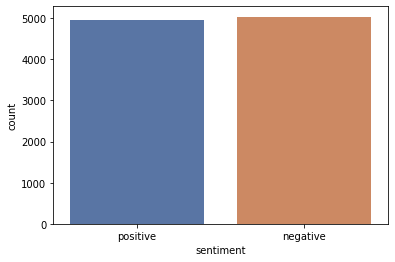

In [14]:
# Checking for the dataset balance , the negative and the positive reviews seems to be equal 
sns.countplot(x = 'sentiment', data = df, palette = 'deep')

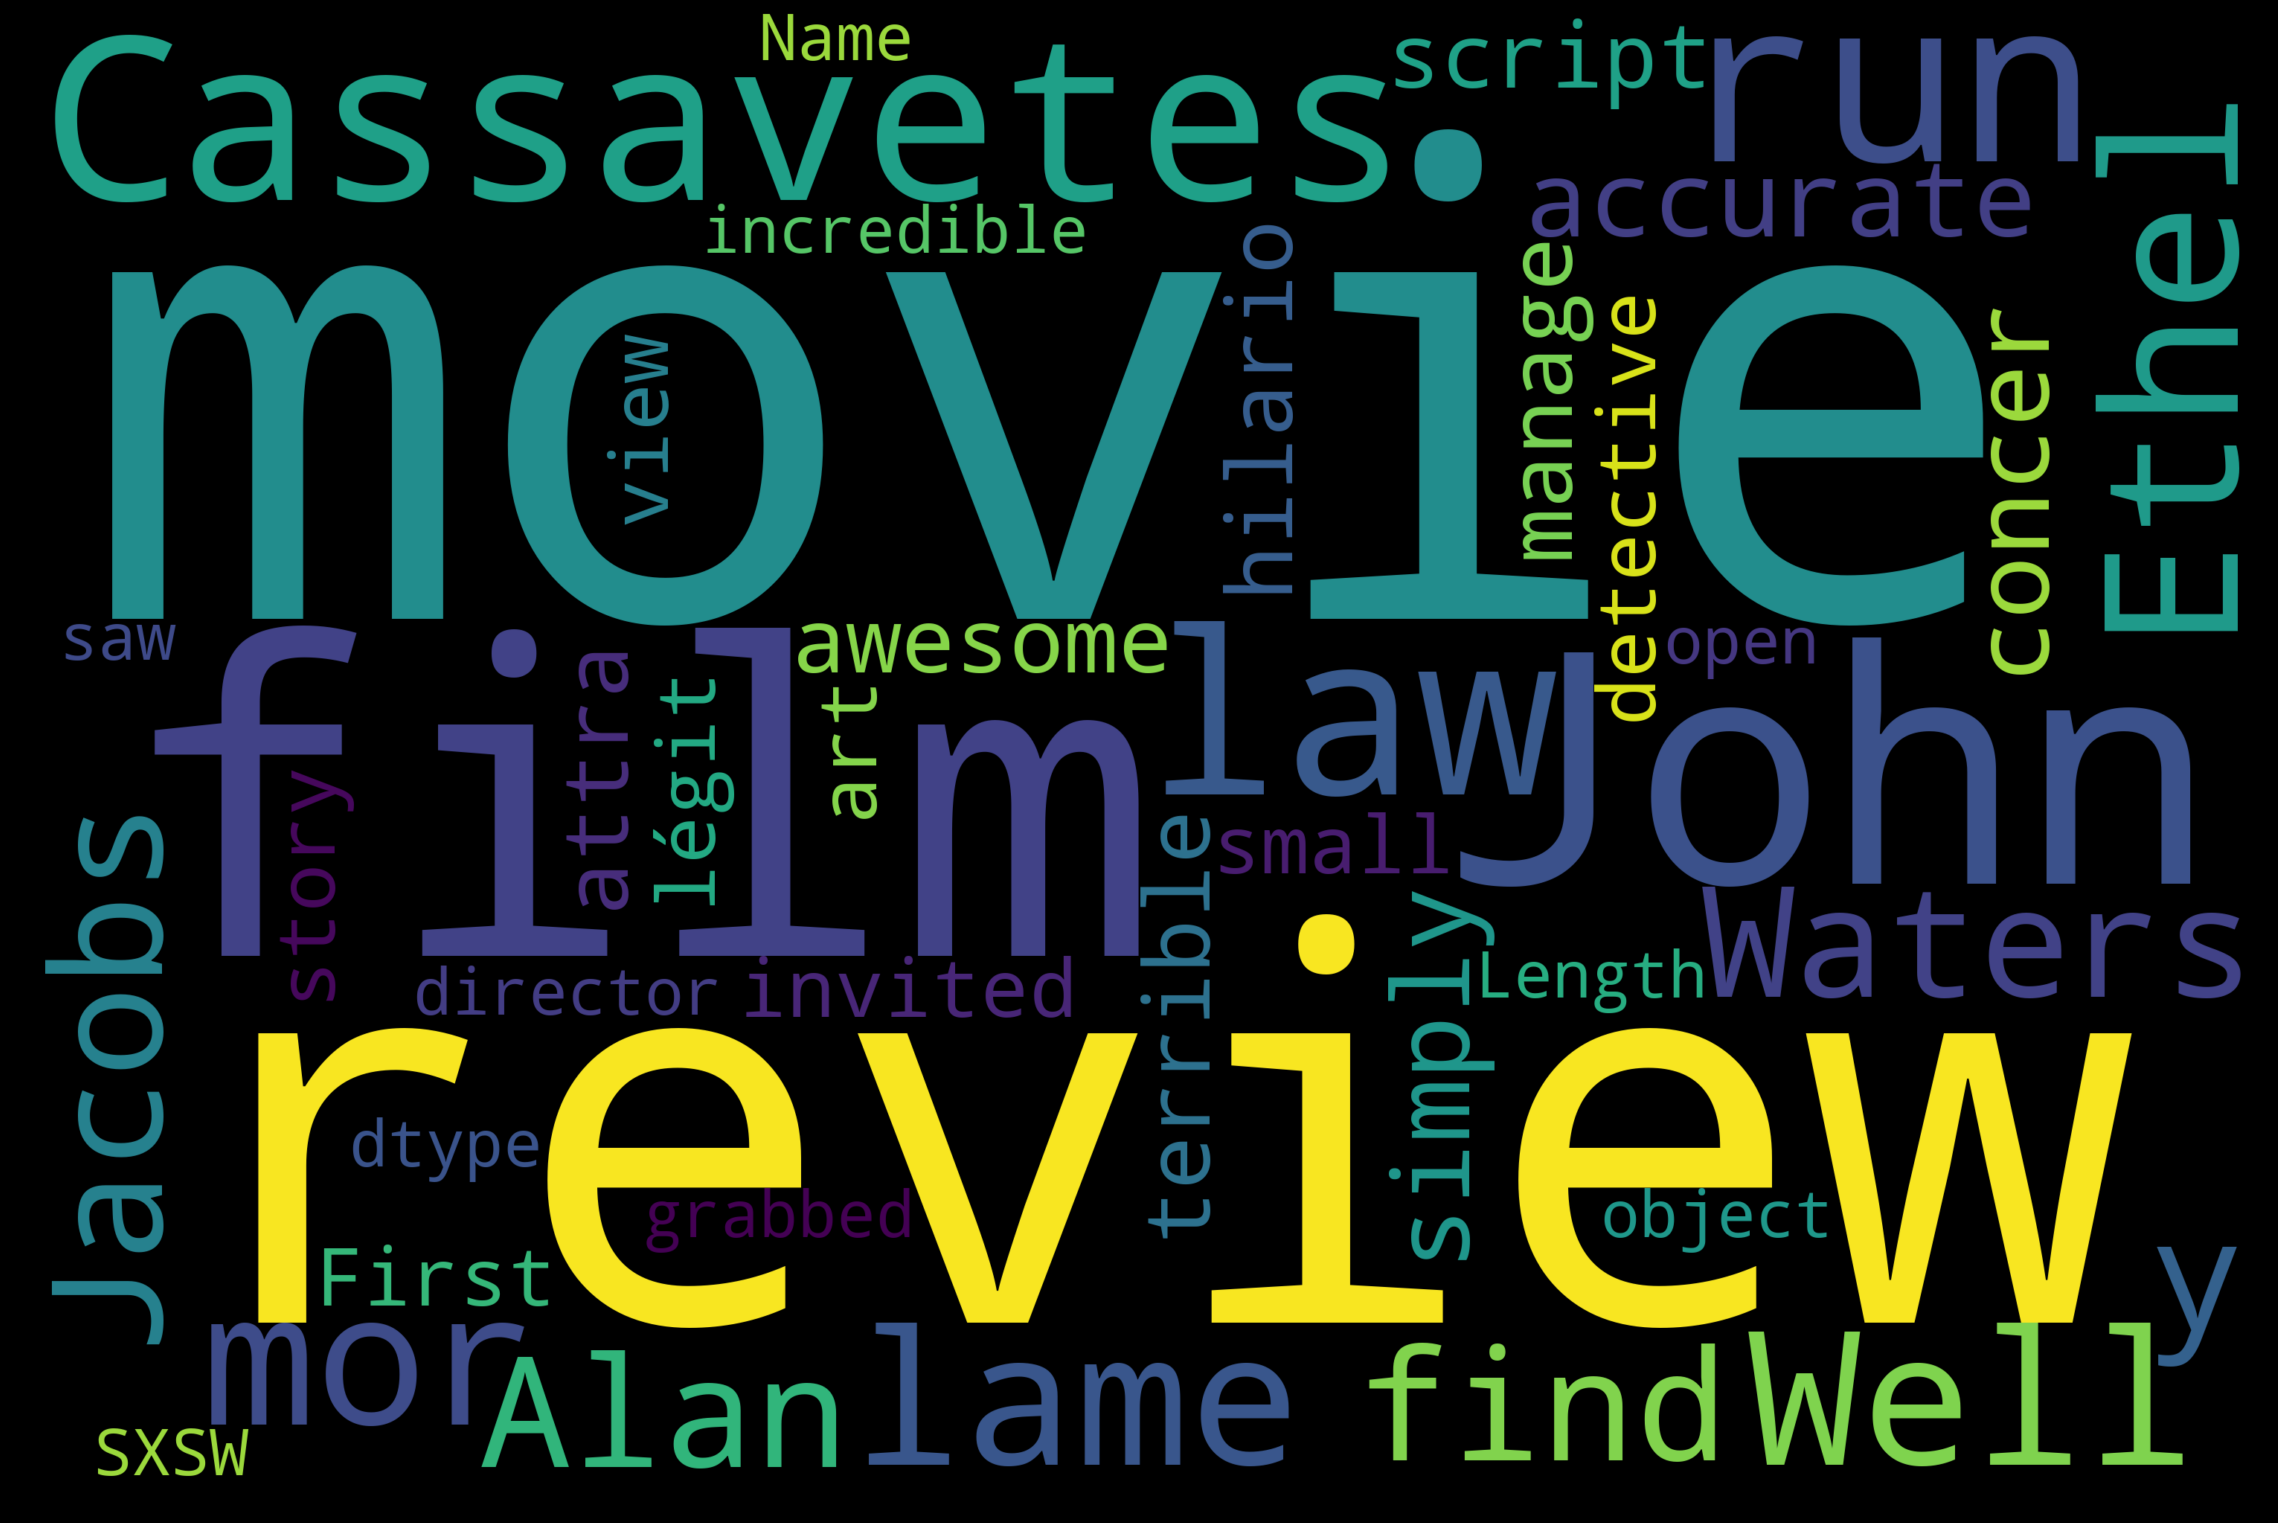

In [17]:
# !pip install wordcloud
# import wordcloud as wc

text = df["review"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

# Data Cleaning and Preprocessing 

In [22]:
# lower casing all the words in review column 
df_copy = df.copy()
df_copy['review'] = df_copy['review'].apply(lambda review : re.sub(r"[0-9]", " ", review.lower()))
df_copy['review']

0       john cassavetes is on the run from the law. he...
1       it's not just that the movie is lame. it's mor...
2       well, if it weren't for ethel waters and a  -y...
3       i find alan jacobs review very accurate concer...
4       this movie is simply awesome. it is so hilario...
                              ...                        
9995    how did such a terrible script manage to attra...
9996    i was invited to view this film at a small art...
9997    first of all,there is a detective story:"légit...
9998    this movie grabbed me with the incredible open...
9999    i saw this film at sxsw with the director in a...
Name: review, Length: 10000, dtype: object

In [23]:
# tokenization 
tokenizer = TreebankWordTokenizer()

df_copy['review'] = df_copy['review'].apply(lambda review: tokenizer.tokenize(review))
df_copy['review']

0       [john, cassavetes, is, on, the, run, from, the...
1       [it, 's, not, just, that, the, movie, is, lame...
2       [well, ,, if, it, were, n't, for, ethel, water...
3       [i, find, alan, jacobs, review, very, accurate...
4       [this, movie, is, simply, awesome., it, is, so...
                              ...                        
9995    [how, did, such, a, terrible, script, manage, ...
9996    [i, was, invited, to, view, this, film, at, a,...
9997    [first, of, all, ,, there, is, a, detective, s...
9998    [this, movie, grabbed, me, with, the, incredib...
9999    [i, saw, this, film, at, sxsw, with, the, dire...
Name: review, Length: 10000, dtype: object

In [28]:
# stop words removal 
#!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# All english stop words
stop_words = stopwords.words('english')

# since the negations are included in the stop words but we don't want to remove them from our dataset as not to skrew the model thus we keep them
negation_list = ["no","nor", "not", "n't"]
stop_words = [word for word in stop_words if word not in negation_list]

# Removing the stop words 
df_copy['review'] = df_copy['review'].apply(lambda review: [word for word in review if word not in stop_words])
df_copy['review'].tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['john',
  'cassavetes',
  'run',
  'law.',
  'bottom',
  'heap.',
  'sees',
  'negro',
  'sidney',
  'poitier',
  'equal',
  'quickly',
  'become',
  'friends',
  ',',
  'forming',
  'sort',
  'alliance',
  'bully',
  'foreman',
  'played',
  'jack',
  'warden.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'someone',
  'worked',
  'warehouse',
  'younger',
  ',',
  'tell',
  'warehouse',
  'fights',
  ',',
  'complete',
  'tumbling',
  'packing',
  'cases',
  'flailing',
  'grappling',
  'hooks',
  'realistic',
  'gets.',
  "'ve",
  'fights',
  'like',
  ',',
  'although',
  'no',
  'one',
  'got',
  'killed.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  'introduction',
  'sidney',
  'poitier',
  "'s",
  'widow',
  'variation',
  'shakespeare',
  "'s",
  'shylock',
  '``',
  'not',
  'bleed',
  '?',
  "''",
  'anti',
  'racist',
  'film',
  ',',
  ',',
  'time',
  ',',
  'much',
  'needed.',
  '<',
  'br',
  '/',
  '>',
  '<',
  'br',
  '/',
  '>',
  '

In [32]:
df_copy['review'] = df_copy['review'].apply(lambda review : list(filter(None,[word.replace('.', '').replace('_','').replace('-','').replace("'","" ).replace("`","") for word in review if word not in string.punctuation])))

df_copy['review']

0       [john, cassavetes, run, law, bottom, heap, see...
1       [s, not, movie, lame, s, that, movie, unnecess...
2       [well, nt, ethel, waters, yearold, sammy, davi...
3       [find, alan, jacobs, review, accurate, concern...
4       [movie, simply, awesome, hilarious, although, ...
                              ...                        
9995    [terrible, script, manage, attract, cast, ridi...
9996    [invited, view, film, small, art, museum, scre...
9997    [first, detective, story, légitime, défense, b...
9998    [movie, grabbed, incredible, opening, sequence...
9999    [saw, film, sxsw, director, attendance, quite,...
Name: review, Length: 10000, dtype: object